## Mission 1. Netfilx and Code

### Mandatory Part
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

**한국 작품은 총 얼마나 있는가?**
- country column을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

### Answer

In [1]:
## 라이브러리 선언과 데이터 준비

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

net_df = pd.read_csv("./netflix_titles.csv")
net_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
# country열의 한국 작품 추출 및 shape에서 행 갯수 출력

print("한국 작품의 수 :", net_df[net_df['country'] == 'South Korea'].shape[0])

한국 작품의 수 : 183


### Bonus Part
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

**가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?**
- country column을 기준으로 한다.
- **단일 국가**인 경우를 기준으로 결과를 구해보자.


### Answer

In [3]:
# country col 값들 살펴보기

net_df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [4]:
# 단일국가 기준 -> ',' 문자가 안들어간 country -> .str.contains('',na=)
# 작품의 수의 기준 -> show_id
# 작품 수를 단일국가 기준 나라별 groupby 

net_df_cnt = net_df[net_df['country'].str.contains(',',na = False) == False ].groupby(by=['country'])['show_id'].count()

# .idxmax() : 최대값의 index 리턴
print("가장 많은 작품이 올라간 국가 : {}\n해당 나라의 작품 수 : {}".format(net_df_cnt.idxmax() , net_df_cnt.max())) 

가장 많은 작품이 올라간 국가 : United States
해당 나라의 작품 수 : 2555


----

## Mission 2. 가즈아!

### Mandatory Part

다음 데이터가 주어졌을 때 **2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

### Answer

In [5]:
## 라이브러리 선언과 데이터 준비

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

btc_df = pd.read_csv("./BitCoin.csv")
btc_df.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [7]:
# row 생략 없이 출력 -> 10 대신 None
pd.set_option('display.max_rows', 10) 

# 기간 내(2016.06 ~ 2017.06)에 open col 가져오기
btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%Y-%m-%d', errors='raise')  # object -> datetime 자료형으로 변수변환
btc_year_df = btc_df[(btc_df['Date'] >= "2016-06-01") & (btc_df['Date'] <= '2017-06-30')] # 2016.06~2017.06

# Date col의 값을 기준으로 날짜순 정렬 -> .sort_values(by=,ascending=)
# 내림차순으로 정렬하고 싶다면 ascending 옵션을 False
btc_year_df = btc_year_df.sort_values(by='Date' ,ascending=True)
btc_year_df  # 기간 내(2016.06 ~ 2017.06)에 open col

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
625,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
594,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
565,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
534,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
504,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
88,88,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000
87,87,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000
86,86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000
85,85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000


In [35]:
# 5-ma
# .rolling(5).mean()

five_ma = btc_year_df.loc[:,['Date','Open']]  # 해당 기간 동안의 Date, Open 값만 가져옴 .loc[]
five_ma.Open = five_ma.Open.rolling(5).mean()  # 각 날짜의 5일간 평균값
five_ma = five_ma.iloc[4:]  # 평균이 없는 1~4일 까지 NaN값 제외
five_ma.columns = ['Date','5MA']

five_ma

,Date,5MA
504,2016-06-05,418.238
473,2016-06-06,446.786
443,2016-06-07,503.552
412,2016-06-08,538.454
381,2016-06-09,574.900
...,...,...
88,2017-06-26,2666.942
87,2017-06-27,2624.426
86,2017-06-28,2593.564
85,2017-06-29,2559.372


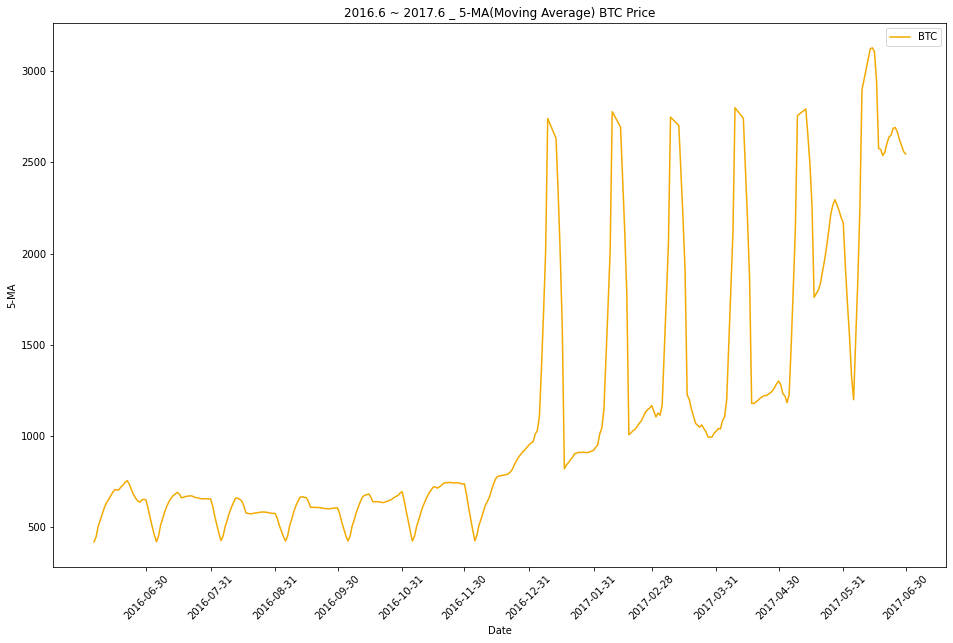

In [36]:
# 시계열 데이터 -> plot() 그래프 그리기
plt.figure(figsize=(16,10))
plt.plot(five_ma['Date'],five_ma['5MA'],color = "#f2a900", label='BTC')

plt.xlabel('Date')
plt.ylabel('5-MA')
plt.xticks(pd.period_range('2016-06-01', '2017-06-30', freq= 1 *'1m'), rotation=45) # 기간동안 한달 간격 / pd.period_range()
plt.title("2016.6 ~ 2017.6 _ 5-MA(Moving Average) BTC Price")

plt.legend()
plt.show()

### Bonus Part

위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, **이더리움 : 검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

### Answer

In [11]:
eth_df = pd.read_csv('./ETH_day.csv')
eth_df.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [16]:
#날짜별 sort
#Date, Open 기간내에 자르기

eth_df['Date'] = pd.to_datetime(eth_df['Date'], format='%Y-%m-%d', errors='raise')  # object -> datetime 자료형으로 변수변환
eth_year_df = eth_df[(eth_df['Date'] >= "2016-06-01") & (eth_df['Date'] <= '2017-06-30')] # 2016.06~2017.06
eth_year_df = eth_year_df.sort_values(by='Date',ascending=True)
eth_year_df

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67
...,...,...,...,...,...,...,...,...
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06


In [33]:
five_ma_eth = eth_year_df.loc[:,['Date','Open']]
five_ma_eth.Open = five_ma_eth.Open.rolling(5).mean()
five_ma_eth.dropna(axis = 0, inplace = True)  # .dropna(axis=,inplace=)  axis= 0->행,1->열, inplace 데이터프레임에 덮어 저장-True
five_ma_eth.columns = ['Date','5MA']
five_ma_eth

,Date,5MA
1410,2016-06-05,13.982
1409,2016-06-06,13.928
1408,2016-06-07,13.970
1407,2016-06-08,14.090
1406,2016-06-09,14.188
...,...,...
1024,2017-06-26,310.850
1023,2017-06-27,296.592
1022,2017-06-28,289.898
1021,2017-06-29,288.066


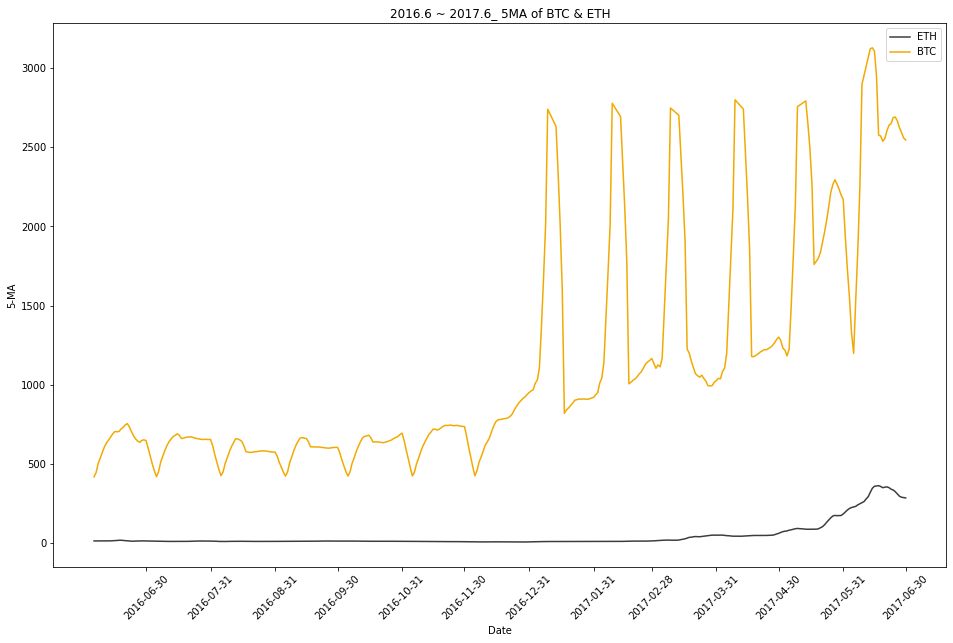

In [40]:
# 시계열 데이터 -> plot() 그래프 그리기

plt.figure(figsize=(16,10))
plt.plot(five_ma_eth['Date'],five_ma_eth['5MA'], color='#3c3c3d',label = 'ETH')
plt.plot(five_ma['Date'],five_ma['5MA'],color = "#f2a900", label='BTC')

plt.xlabel('Date')
plt.ylabel('5-MA')
plt.xticks(pd.period_range('2016-06-01','2017-06-30', freq=1*'1m'), rotation= 45)
plt.title("2016.6 ~ 2017.6_ 5MA of BTC & ETH")

plt.legend()
plt.show()